In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt

In [2]:
font = {
    "family":"Microsoft Yahei",
    "size":'14'
}
plt.rc("font",**font)

1.获取数据源

In [3]:
df = pd.read_excel(r'个人消费贷是否违约.xlsx')
print(df.shape)
print(df.columns)
print(df.head())

(30000, 24)
Index(['信用额度', '性别', '教育', '婚姻状况', '年龄', '10月还款', '9月还款', '8月还款', '7月还款',
       '6月还款', '5月还款', '10月的账单金额', '9月的账单金额', '8月的账单金额', '7月的账单金额', '6月的账单金额',
       '5月的账单金额', '10月支付金额', '9月支付金额', '8月支付金额', '7月支付金额', '6月支付金额', '5月支付金额',
       '是否违约'],
      dtype='object')
     信用额度 性别   教育 婚姻状况  年龄      10月还款       9月还款       8月还款       7月还款  \
0   20000  女  研究生   已婚  24    还款延迟二个月    还款延迟二个月       按时还款       按时还款   
1  120000  女  研究生   未婚  26       按时还款    还款延迟二个月  还款延迟不到一个月  还款延迟不到一个月   
2   90000  女  研究生   未婚  34  还款延迟不到一个月  还款延迟不到一个月  还款延迟不到一个月  还款延迟不到一个月   
3   50000  女  研究生   已婚  37  还款延迟不到一个月  还款延迟不到一个月  还款延迟不到一个月  还款延迟不到一个月   
4   50000  男  研究生   已婚  57       按时还款  还款延迟不到一个月       按时还款  还款延迟不到一个月   

        6月还款  ... 7月的账单金额  6月的账单金额  5月的账单金额  10月支付金额  9月支付金额  8月支付金额  7月支付金额  \
0       提前还款  ...       0        0        0        0     689       0       0   
1  还款延迟不到一个月  ...    3272     3455     3261        0    1000    1000    1000   
2  还款延迟不到一个月  ...   14331    1494

In [4]:
# 去除重复数据
df.drop_duplicates(inplace=True)

In [5]:
df.shape

(29965, 24)

2.查看是否有缺失值，如果没有缺失值就不用管

In [6]:
# 各字段缺失比例计算（没有缺失值就不用管）
na_rate = (len(df)-df.count())/len(df)
na_rate_order = na_rate.sort_values(ascending=False)
na_rate_order

信用额度        0.0
性别          0.0
5月支付金额      0.0
6月支付金额      0.0
7月支付金额      0.0
8月支付金额      0.0
9月支付金额      0.0
10月支付金额     0.0
5月的账单金额     0.0
6月的账单金额     0.0
7月的账单金额     0.0
8月的账单金额     0.0
9月的账单金额     0.0
10月的账单金额    0.0
5月还款        0.0
6月还款        0.0
7月还款        0.0
8月还款        0.0
9月还款        0.0
10月还款       0.0
年龄          0.0
婚姻状况        0.0
教育          0.0
是否违约        0.0
dtype: float64

3.数据探索、数据清洗、特征工程

In [7]:
# 类别少的，如果是文本类型，需要数值化处理
leibie_dict = {}
# 将类别很多的列保存下来，查看是否需要进行分段化处理
piecewise_dict = {}
for col in list(df.columns):
    print(col)
    g = df[col].value_counts()
    print(g)
    print('*'*30)
    cnt = len(g)
    if cnt<=5:
        leibie_dict[col] = cnt
    else:
        piecewise_dict[col] = cnt

信用额度
50000      3363
20000      1975
30000      1610
80000      1564
200000     1524
           ... 
800000        2
1000000       1
760000        1
690000        1
327680        1
Name: 信用额度, Length: 81, dtype: int64
******************************
性别
女    18091
男    11874
Name: 性别, dtype: int64
******************************
教育
研究生    14019
大学     10563
高中      4915
其他       468
Name: 教育, dtype: int64
******************************
婚姻状况
未婚    16322
已婚    13643
Name: 婚姻状况, dtype: int64
******************************
年龄
29    1602
27    1475
28    1406
30    1394
26    1252
31    1213
25    1185
34    1161
32    1157
33    1146
24    1126
35    1113
36    1107
37    1041
39     951
38     943
23     930
40     870
41     822
42     792
44     700
43     669
45     617
46     570
22     560
47     501
48     466
49     449
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
21      67
60      67
61      56
62      44
64      31
63

①类别少的

In [8]:
leibie_dict

{'性别': 2, '教育': 4, '婚姻状况': 2, '是否违约': 2}

In [9]:
for col in leibie_dict.keys():
    print(col)
    g = df[col].value_counts()
    print(g)
    print('*'*30)

性别
女    18091
男    11874
Name: 性别, dtype: int64
******************************
教育
研究生    14019
大学     10563
高中      4915
其他       468
Name: 教育, dtype: int64
******************************
婚姻状况
未婚    16322
已婚    13643
Name: 婚姻状况, dtype: int64
******************************
是否违约
否    23335
是     6630
Name: 是否违约, dtype: int64
******************************


In [10]:
def deal_leibie(s, leibie_dict):
    return leibie_dict[s]

In [11]:
df['性别'] = df['性别'].apply(lambda x: deal_leibie(x, {'男': 0, '女': 1}))
df['教育'] = df['教育'].apply(lambda x: deal_leibie(x, {'其他': 0, '高中': 1, '大学': 2, '研究生': 3}))
df['婚姻状况'] = df['婚姻状况'].apply(lambda x: deal_leibie(x, {'未婚': 0, '已婚': 1}))
df['是否违约'] = df['是否违约'].apply(lambda x: deal_leibie(x, {'否': 0, '是': 1}))

In [12]:
for col in leibie_dict.keys():
    print(col)
    g = df[col].value_counts()
    print(g)
    print('*'*30)

性别
1    18091
0    11874
Name: 性别, dtype: int64
******************************
教育
3    14019
2    10563
1     4915
0      468
Name: 教育, dtype: int64
******************************
婚姻状况
0    16322
1    13643
Name: 婚姻状况, dtype: int64
******************************
是否违约
0    23335
1     6630
Name: 是否违约, dtype: int64
******************************


②类别多的

In [13]:
piecewise_dict

{'信用额度': 81,
 '年龄': 56,
 '10月还款': 11,
 '9月还款': 11,
 '8月还款': 11,
 '7月还款': 11,
 '6月还款': 10,
 '5月还款': 10,
 '10月的账单金额': 22723,
 '9月的账单金额': 22346,
 '8月的账单金额': 22026,
 '7月的账单金额': 21548,
 '6月的账单金额': 21010,
 '5月的账单金额': 20604,
 '10月支付金额': 7943,
 '9月支付金额': 7899,
 '8月支付金额': 7518,
 '7月支付金额': 6937,
 '6月支付金额': 6897,
 '5月支付金额': 6939}

In [14]:
len(piecewise_dict.keys())

20

还款类数据

In [15]:
# '10月还款', '9月还款'， '8月还款', '7月还款'， '6月还款', '5月还款'
huankuan_lst = ['10月还款', '9月还款', '8月还款', '7月还款', '6月还款', '5月还款']
huankuan_leixing = []
for col in huankuan_lst:
    huankuan_leixing.extend(list(set(df[col])))
huankuan_leixing = list(set(huankuan_leixing))
print(len(huankuan_leixing))
print(huankuan_leixing)

11
['还款延迟四个月', '还款延迟八个月', '提前还款', '还款延迟六个月', '还款延迟七个月', '还款延迟二个月', '还款延迟不到一个月', '还款延迟五个月', '按时还款', '还款延迟三个月', '还款延迟一个月']


- 统计还款状态的各类数量

In [16]:
df['huankuan_str'] = df['10月还款']+','+df['9月还款']+','+df['8月还款']+','+df['7月还款']+','+df['6月还款']+','+df['5月还款']
df['huankuan_str'].head()

0                  还款延迟二个月,还款延迟二个月,按时还款,按时还款,提前还款,提前还款
1    按时还款,还款延迟二个月,还款延迟不到一个月,还款延迟不到一个月,还款延迟不到一个月,还款延...
2    还款延迟不到一个月,还款延迟不到一个月,还款延迟不到一个月,还款延迟不到一个月,还款延迟不到...
3    还款延迟不到一个月,还款延迟不到一个月,还款延迟不到一个月,还款延迟不到一个月,还款延迟不到...
4    按时还款,还款延迟不到一个月,按时还款,还款延迟不到一个月,还款延迟不到一个月,还款延迟不到一个月
Name: huankuan_str, dtype: object

In [17]:
# 特征工程：统计各个还款状态的次数
for huankuan_leibie in huankuan_leixing:
    print(huankuan_leibie)
    df[huankuan_leibie+'_cnt'] = df['huankuan_str'].apply(lambda x: x.count(huankuan_leibie)) #同一个人
del df['huankuan_str']

还款延迟四个月
还款延迟八个月
提前还款
还款延迟六个月
还款延迟七个月
还款延迟二个月
还款延迟不到一个月
还款延迟五个月
按时还款
还款延迟三个月
还款延迟一个月


In [18]:
# 交叉组合
df['提前还款_按时还款_total_cnt'] = df['提前还款_cnt'] + df['按时还款_cnt']
df['延迟还款_total_cnt'] = df['还款延迟不到一个月_cnt'] + df['还款延迟一个月_cnt'] + df['还款延迟二个月_cnt'] + df['还款延迟三个月_cnt'] + df['还款延迟四个月_cnt'] + df['还款延迟五个月_cnt'] + df['还款延迟六个月_cnt'] + df['还款延迟七个月_cnt'] + df['还款延迟八个月_cnt']
df['延迟还款_1_total_cnt'] = df['还款延迟不到一个月_cnt'] + df['还款延迟一个月_cnt']
df['延迟还款_2_5_total_cnt'] = df['还款延迟二个月_cnt'] + df['还款延迟三个月_cnt'] + df['还款延迟四个月_cnt'] + df['还款延迟五个月_cnt']
df['延迟还款_6_8_total_cnt'] = df['还款延迟六个月_cnt'] + df['还款延迟七个月_cnt'] + df['还款延迟八个月_cnt']

- 去异常

In [19]:
error_data = df[(df['提前还款_按时还款_total_cnt'] == 6) & (df['是否违约'] == 1)]
len(error_data) / len(df)

0.024595361254797263

In [20]:
df.drop(index=error_data.index, inplace=True)

- 还款状态数值化

In [21]:
huankuan_dict = {'还款延迟不到一个月': 0, '还款延迟一个月': 1, '还款延迟二个月': 2, '还款延迟三个月': 3, 
                '还款延迟四个月': 4, '还款延迟五个月': 5, '还款延迟六个月': 6, '还款延迟七个月': 7, 
                 '还款延迟八个月': 8, '提前还款': 9 , '按时还款': 10}
for col in huankuan_lst:
    piecewise_dict.pop(col, '无该字段')
    df[col] = df[col].apply(lambda x: deal_leibie(x, huankuan_dict))

类别特别多的字段

In [22]:
piecewise_dict

{'信用额度': 81,
 '年龄': 56,
 '10月的账单金额': 22723,
 '9月的账单金额': 22346,
 '8月的账单金额': 22026,
 '7月的账单金额': 21548,
 '6月的账单金额': 21010,
 '5月的账单金额': 20604,
 '10月支付金额': 7943,
 '9月支付金额': 7899,
 '8月支付金额': 7518,
 '7月支付金额': 6937,
 '6月支付金额': 6897,
 '5月支付金额': 6939}

In [23]:
len(piecewise_dict.keys())

14

In [24]:
for col in piecewise_dict.keys():
    g = df.groupby(col).count()['是否违约']
    print(g)
    print('*'*30)

信用额度
10000       486
16000         2
20000      1956
30000      1592
40000       230
           ... 
750000        4
760000        1
780000        2
800000        2
1000000       1
Name: 是否违约, Length: 81, dtype: int64
******************************
年龄
21      66
22     556
23     924
24    1102
25    1175
26    1234
27    1449
28    1377
29    1558
30    1364
31    1182
32    1131
33    1114
34    1128
35    1085
36    1074
37    1005
38     913
39     925
40     839
41     797
42     775
43     657
44     681
45     600
46     549
47     485
48     451
49     437
50     395
51     326
52     299
53     317
54     239
55     206
56     170
57     119
58     115
59      81
60      66
61      56
62      44
63      28
64      29
65      23
66      25
67      15
68       5
69      14
70      10
71       3
72       3
73       2
74       1
75       3
79       1
Name: 是否违约, dtype: int64
******************************
10月的账单金额
-165580    1
-154973    1
-15308     1
-14386     1
-11545     1
  

In [25]:
desc = df[list(piecewise_dict.keys())].describe(percentiles=np.linspace(0, 1, 10, endpoint=False)[1:])
desc

,信用额度,年龄,10月的账单金额,9月的账单金额,8月的账单金额,7月的账单金额,6月的账单金额,5月的账单金额,10月支付金额,9月支付金额,8月支付金额,7月支付金额,6月支付金额,5月支付金额
count,29228.000000,29228.000000,29228.000000,29228.000000,2.922800e+04,29228.000000,29228.000000,29228.000000,29228.000000,2.922800e+04,29228.000000,29228.000000,29228.000000,29228.000000
mean,166147.518818,35.437149,52455.926646,50386.103086,4.816634e+04,44321.667613,41301.227658,39816.490420,5746.724169,6.009257e+03,5294.148009,4888.069214,4839.776721,5257.722047
std,129684.089202,9.215570,74122.625164,71650.279032,6.983944e+04,64788.390664,61253.775835,59970.084694,16719.233183,2.329478e+04,17757.652235,15797.113355,15341.729784,17786.805957
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
10%,30000.000000,25.000000,325.000000,99.700000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
20%,50000.000000,27.000000,2319.600000,1819.400000,1.496400e+03,1248.800000,932.000000,625.000000,390.000000,3.260000e+02,32.000000,0.000000,0.000000,0.000000
30%,70000.000000,29.000000,6926.100000,6426.400000,6.189100e+03,5622.300000,4520.100000,3301.500000,1300.000000,1.200000e+03,844.000000,559.100000,534.000000,496.100000
40%,100000.000000,31.000000,14772.200000,14244.000000,1.358520e+04,12491.000000,10645.200000,9580.800000,1787.800000,1.638000e+03,1274.800000,1000.000000,1000.000000,1000.000000
50%,140000.000000,34.000000,24081.000000,22983.500000,2.115200e+04,19611.000000,18756.500000,17938.000000,2184.000000,2.047000e+03,1900.000000,1514.000000,1558.000000,1500.000000
60%,180000.000000,37.000000,39124.200000,36705.200000,3.310320e+04,29296.200000,27701.200000,26644.400000,3006.000000,3.000000e+03,2500.000000,2200.000000,2200.000000,2147.200000


In [26]:
def get_fenduan_10fenweidian(x, cut_lst):
    if x < cut_lst[0]:
        return 0
    elif x < cut_lst[1]:
        return 1
    elif x < cut_lst[2]:
        return 2
    elif x < cut_lst[3]:
        return 3
    elif x < cut_lst[4]:
        return 4
    elif x < cut_lst[5]:
        return 5
    elif x < cut_lst[6]:
        return 6
    elif x < cut_lst[7]:
        return 7
    elif x < cut_lst[8]:
        return 8
    else:
        return 9

In [27]:
col_name_1 = ['信用额度', '年龄']
for col in col_name_1:
    piecewise_dict.pop(col, '无该字段')
    cut_lst = list(desc.loc[['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', 'max'], col])
    df[col] = df[col].apply(lambda x: get_fenduan_10fenweidian(x, cut_lst))
    # 统计
    g = df.groupby(col).count()['是否违约']
    print(g)
    print('*'*30)

信用额度
0    2444
1    1822
2    4147
3    2907
4    3025
5    2988
6    2645
7    3292
8    2739
9    3219
Name: 是否违约, dtype: int64
******************************
年龄
0    2648
1    2409
2    2826
3    2922
4    3427
5    3287
6    2843
7    2411
8    3423
9    3032
Name: 是否违约, dtype: int64
******************************


账单金额

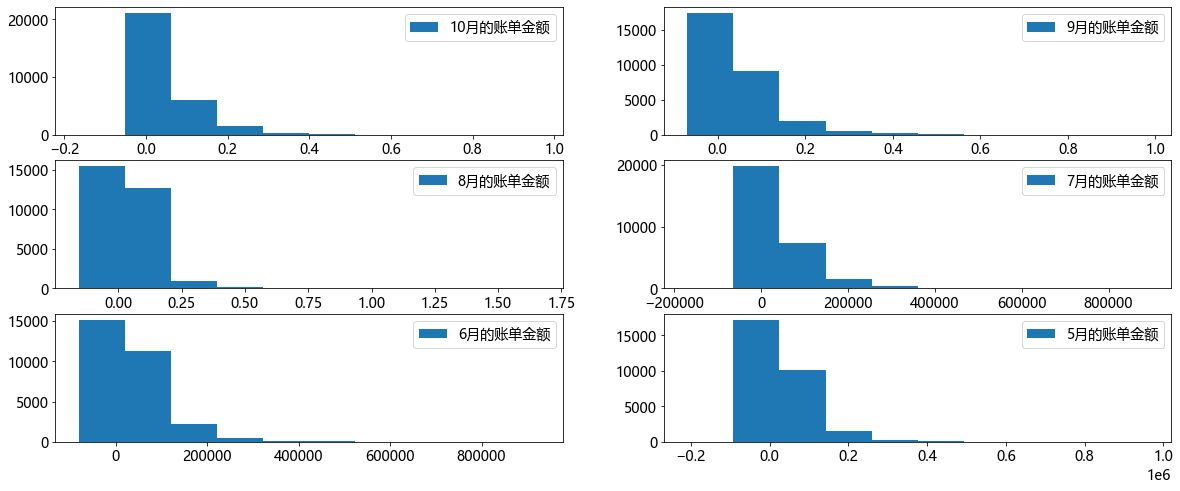

In [28]:
# 先看一下账单金额字段的分布
plt.figure(figsize=[20,8])

plt.subplot(321)
plt.hist(df['10月的账单金额'],label='10月的账单金额')
plt.legend()

plt.subplot(322)
plt.hist(df['9月的账单金额'],label='9月的账单金额')
plt.legend()

plt.subplot(323)
plt.hist(df['8月的账单金额'],label='8月的账单金额')
plt.legend()

plt.subplot(324)
plt.hist(df['7月的账单金额'],label='7月的账单金额')
plt.legend()

plt.subplot(325)
plt.hist(df['6月的账单金额'],label='6月的账单金额')
plt.legend()

plt.subplot(326)
plt.hist(df['5月的账单金额'],label='5月的账单金额')
plt.legend()

plt.show()

In [29]:
desc = df[list(piecewise_dict.keys())].describe(percentiles=np.linspace(0, 1, 10, endpoint=False)[1:])
desc

,10月的账单金额,9月的账单金额,8月的账单金额,7月的账单金额,6月的账单金额,5月的账单金额,10月支付金额,9月支付金额,8月支付金额,7月支付金额,6月支付金额,5月支付金额
count,29228.000000,29228.000000,2.922800e+04,29228.000000,29228.000000,29228.000000,29228.000000,2.922800e+04,29228.000000,29228.000000,29228.000000,29228.000000
mean,52455.926646,50386.103086,4.816634e+04,44321.667613,41301.227658,39816.490420,5746.724169,6.009257e+03,5294.148009,4888.069214,4839.776721,5257.722047
std,74122.625164,71650.279032,6.983944e+04,64788.390664,61253.775835,59970.084694,16719.233183,2.329478e+04,17757.652235,15797.113355,15341.729784,17786.805957
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
10%,325.000000,99.700000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
20%,2319.600000,1819.400000,1.496400e+03,1248.800000,932.000000,625.000000,390.000000,3.260000e+02,32.000000,0.000000,0.000000,0.000000
30%,6926.100000,6426.400000,6.189100e+03,5622.300000,4520.100000,3301.500000,1300.000000,1.200000e+03,844.000000,559.100000,534.000000,496.100000
40%,14772.200000,14244.000000,1.358520e+04,12491.000000,10645.200000,9580.800000,1787.800000,1.638000e+03,1274.800000,1000.000000,1000.000000,1000.000000
50%,24081.000000,22983.500000,2.115200e+04,19611.000000,18756.500000,17938.000000,2184.000000,2.047000e+03,1900.000000,1514.000000,1558.000000,1500.000000
60%,39124.200000,36705.200000,3.310320e+04,29296.200000,27701.200000,26644.400000,3006.000000,3.000000e+03,2500.000000,2200.000000,2200.000000,2147.200000


In [38]:
zhangdan_lst = ['10月的账单金额', '9月的账单金额', '8月的账单金额', '7月的账单金额', '6月的账单金额', '5月的账单金额']
# 负的账单金额：四分位
zhangdan_desc_fu_df = pd.DataFrame(columns=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])
# 正的账单金额：十分位
zhangdan_desc_zheng_df = pd.DataFrame(columns=['count', 'mean', 'std', 'min', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', 'max'])

for col in zhangdan_lst:
    # 负数
    fu_desc = df[col][df[col]<0].describe()
    zhangdan_desc_fu_df = zhangdan_desc_fu_df.append(pd.DataFrame(fu_desc).T)
    # 正数
    zheng_desc = df[col][df[col]>=0].describe(percentiles=np.linspace(0, 1, 10, endpoint=False)[1:])
    zhangdan_desc_zheng_df = zhangdan_desc_zheng_df.append(pd.DataFrame(zheng_desc).T)

In [39]:
zhangdan_desc_fu_df

,count,mean,std,min,25%,50%,75%,max
10月的账单金额,560.0,-1203.923214,9672.520177,-165580.0,-470.25,-93.5,-11.75,-1.0
9月的账单金额,619.0,-1288.117932,5116.106274,-69777.0,-678.50,-131.0,-15.00,-1.0
8月的账单金额,607.0,-1444.833608,7254.696242,-157264.0,-815.00,-152.0,-15.00,-1.0
7月的账单金额,628.0,-1615.853503,8466.851427,-170000.0,-916.00,-162.0,-18.00,-1.0
6月的账单金额,611.0,-1697.472995,6160.125182,-81334.0,-1000.00,-200.0,-18.00,-1.0
5月的账单金额,652.0,-2606.038344,12328.133878,-209051.0,-1147.00,-202.5,-20.00,-1.0


In [40]:
zhangdan_desc_zheng_df

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
10月的账单金额,28668.0,53504.116820,74446.755311,0.0,435.0,2757.4,7766.2,15731.6,25287.5,40779.8,56379.9,87223.4,146026.0,964511.0
9月的账单金额,28609.0,51504.154846,72008.688906,0.0,326.0,2400.0,7343.4,15334.2,24346.0,38423.0,53218.4,83903.6,140309.4,983931.0
8月的账单金额,28621.0,49218.500192,70189.543533,0.0,200.0,2032.0,7100.0,14898.0,22495.0,34721.0,50531.0,79511.0,135146.0,1664089.0
7月的账单金额,28600.0,45330.365629,65121.275853,0.0,0.0,1709.6,6615.9,13606.8,20129.0,29842.6,47862.6,74025.2,126417.0,891586.0
6月的账单金额,28617.0,42219.290562,61571.165857,0.0,0.0,1261.0,5411.6,11814.6,19220.0,28382.2,44231.0,69180.0,119362.8,927171.0
5月的账单金额,28576.0,40784.417658,60274.440104,0.0,0.0,885.0,4166.5,10188.0,18601.5,27554.0,42181.5,66974.0,116672.0,961664.0


In [33]:
zhangdan_fenweidian_lst = list(zhangdan_desc_fu_df.mean().loc[['25%', '50%', '75%', 'max']])
zhangdan_fenweidian_lst.extend(list(zhangdan_desc_zheng_df.mean().loc[['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', 'max']]))
print(len(zhangdan_fenweidian_lst))
print(zhangdan_fenweidian_lst)

14
[-837.7916666666666, -156.83333333333334, -16.291666666666668, -1.0, 160.16666666666666, 1840.8333333333333, 6400.600000000002, 13595.533333333338, 21679.833333333332, 33283.766666666685, 49067.399999999994, 76802.86666666668, 130655.53333333334, 1065492.0]


In [34]:
def get_fenduan_14fenweidian(x, cut_lst):
    if x < cut_lst[0]:
        return 0
    elif x < cut_lst[1]:
        return 1
    elif x < cut_lst[2]:
        return 2
    elif x < cut_lst[3]:
        return 3
    elif x < cut_lst[4]:
        return 4
    elif x < cut_lst[5]:
        return 5
    elif x < cut_lst[6]:
        return 6
    elif x < cut_lst[7]:
        return 7
    elif x < cut_lst[8]:
        return 8
    elif x < cut_lst[9]:
        return 9
    elif x < cut_lst[10]:
        return 10
    elif x < cut_lst[11]:
        return 11
    elif x < cut_lst[12]:
        return 12
    else:
        return 13

In [35]:
for col in zhangdan_lst:
    piecewise_dict.pop(col, '无该字段')
    df[col] = df[col].apply(lambda x: get_fenduan_14fenweidian(x, zhangdan_fenweidian_lst))
    # 统计
    g = df.groupby(col).count()['是否违约']
    print(g)
    print('*'*30)

10月的账单金额
0      105
1      139
2      151
3      152
4     1978
5     2886
6     3112
7     2794
8     2795
9     2586
10    2752
11    3156
12    3143
13    3479
Name: 是否违约, dtype: int64
******************************
9月的账单金额
0      124
1      177
2      156
3      147
4     2418
5     2845
6     2891
7     2746
8     2850
9     2661
10    2710
11    3169
12    3050
13    3284
Name: 是否违约, dtype: int64
******************************
8月的账单金额
0      148
1      153
2      150
3      136
4     2769
5     2785
6     2735
7     2820
8     3037
9     2832
10    2623
11    3050
12    2931
13    3059
Name: 是否违约, dtype: int64
******************************
7月的账单金额
0      166
1      149
2      158
3      133
4     3057
5     2813
6     2637
7     2949
8     3361
9     3066
10    2457
11    2789
12    2780
13    2713
Name: 是否违约, dtype: int64
******************************
6月的账单金额
0      169
1      156
2      154
3      110
4     3413
5     2968
6     2637
7     3007
8     3460
9     3127
10    230

支付金额

In [36]:
zhifu_lst = ['10月支付金额', '9月支付金额', '8月支付金额', '7月支付金额', '6月支付金额', '5月支付金额']
zhifu_desc = df[zhifu_lst].describe(percentiles=np.linspace(0, 1, 10, endpoint=False)[1:])
zhifu_fenweidian_lst = list(zhifu_desc.T.iloc[:, 3:].mean().loc[['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', 'max']])
zhifu_fenweidian_lst

[0.0,
 124.66666666666667,
 822.2000000000007,
 1283.4333333333336,
 1783.8333333333333,
 2508.8666666666672,
 3665.0666666666643,
 5450.100000000002,
 9983.199999999997,
 838341.0]

In [37]:
def get_fenduan_zhifu_fenweidian(x):
    if x < 500:
        return 0
    elif x < 1200:
        return 1
    elif x < 1700:
        return 2
    elif x < 2400:
        return 3
    elif x < 3500:
        return 4
    elif x < 5400:
        return 5
    elif x < 9800:
        return 6
    else:
        return 7

In [38]:
for col in zhifu_lst:
    piecewise_dict.pop(col, '无该字段')
    df[col] = df[col].map(get_fenduan_zhifu_fenweidian)
    # 统计
    g = df.groupby(col).count()['是否违约']
    print(g)
    print('*'*30)

10月支付金额
0    6209
1    1850
2    3134
3    3985
4    3381
5    3731
6    3299
7    3639
Name: 是否违约, dtype: int64
******************************
9月支付金额
0    6412
1    2187
2    3315
3    3776
4    3313
5    3587
6    3066
7    3572
Name: 是否违约, dtype: int64
******************************
8月支付金额
0    7396
1    3776
2    2763
3    3255
4    2931
5    3266
6    2654
7    3187
Name: 是否违约, dtype: int64
******************************
7月支付金额
0    8305
1    4849
2    1962
3    2818
4    2772
5    3250
6    2362
7    2910
Name: 是否违约, dtype: int64
******************************
6月支付金额
0    8412
1    4630
2    1917
3    2969
4    2814
5    3228
6    2385
7    2873
Name: 是否违约, dtype: int64
******************************
5月支付金额
0    8779
1    4519
2    1850
3    2848
4    2770
5    3286
6    2266
7    2910
Name: 是否违约, dtype: int64
******************************


再次验证一样数据类型和空缺情况

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29228 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   信用额度                 29228 non-null  int64
 1   性别                   29228 non-null  int64
 2   教育                   29228 non-null  int64
 3   婚姻状况                 29228 non-null  int64
 4   年龄                   29228 non-null  int64
 5   10月还款                29228 non-null  int64
 6   9月还款                 29228 non-null  int64
 7   8月还款                 29228 non-null  int64
 8   7月还款                 29228 non-null  int64
 9   6月还款                 29228 non-null  int64
 10  5月还款                 29228 non-null  int64
 11  10月的账单金额             29228 non-null  int64
 12  9月的账单金额              29228 non-null  int64
 13  8月的账单金额              29228 non-null  int64
 14  7月的账单金额              29228 non-null  int64
 15  6月的账单金额              29228 non-null  int64
 16  5月的账单金额              2

In [40]:
# 各字段缺失比例计算（没有缺失值就不用管）
na_rate = (len(df)-df.count())/len(df)
na_rate_order = na_rate.sort_values(ascending=False)
na_rate_order

信用额度                   0.0
性别                     0.0
5月支付金额                 0.0
是否违约                   0.0
还款延迟五个月_cnt            0.0
还款延迟四个月_cnt            0.0
还款延迟七个月_cnt            0.0
还款延迟三个月_cnt            0.0
按时还款_cnt               0.0
还款延迟一个月_cnt            0.0
还款延迟二个月_cnt            0.0
还款延迟六个月_cnt            0.0
还款延迟八个月_cnt            0.0
提前还款_cnt               0.0
还款延迟不到一个月_cnt          0.0
提前还款_按时还款_total_cnt    0.0
延迟还款_total_cnt         0.0
延迟还款_1_total_cnt       0.0
延迟还款_2_5_total_cnt     0.0
6月支付金额                 0.0
7月支付金额                 0.0
8月支付金额                 0.0
6月还款                   0.0
教育                     0.0
婚姻状况                   0.0
年龄                     0.0
10月还款                  0.0
9月还款                   0.0
8月还款                   0.0
7月还款                   0.0
5月还款                   0.0
9月支付金额                 0.0
10月的账单金额               0.0
9月的账单金额                0.0
8月的账单金额                0.0
7月的账单金额                0.0
6月的账单金额                0.0
5

4.筛选入模的列

In [41]:
# 相关性
label_corr = df.corr()['是否违约'].abs().sort_values(ascending=False)
print(len(label_corr))
print(label_corr)

40
是否违约                   1.000000
延迟还款_2_5_total_cnt     0.441002
还款延迟二个月_cnt            0.429405
信用额度                   0.202561
还款延迟三个月_cnt            0.198762
延迟还款_total_cnt         0.187963
提前还款_按时还款_total_cnt    0.187963
按时还款_cnt               0.142934
10月支付金额                0.130096
还款延迟一个月_cnt            0.128808
9月支付金额                 0.123373
8月还款                   0.115806
7月还款                   0.110643
8月支付金额                 0.109784
10月还款                  0.109633
6月还款                   0.107223
9月还款                   0.105730
提前还款_cnt               0.105088
5月支付金额                 0.102989
7月支付金额                 0.101611
还款延迟不到一个月_cnt          0.099811
5月还款                   0.099092
6月支付金额                 0.095722
还款延迟四个月_cnt            0.091591
延迟还款_1_total_cnt       0.085093
延迟还款_6_8_total_cnt     0.081044
还款延迟七个月_cnt            0.075031
还款延迟五个月_cnt            0.052612
还款延迟六个月_cnt            0.051465
5月的账单金额                0.048353
7月的账单金额                0.048162
性别   

In [42]:
feature = list(label_corr[label_corr>0.1].index)
print(len(feature))
print(feature)

20
['是否违约', '延迟还款_2_5_total_cnt', '还款延迟二个月_cnt', '信用额度', '还款延迟三个月_cnt', '延迟还款_total_cnt', '提前还款_按时还款_total_cnt', '按时还款_cnt', '10月支付金额', '还款延迟一个月_cnt', '9月支付金额', '8月还款', '7月还款', '8月支付金额', '10月还款', '6月还款', '9月还款', '提前还款_cnt', '5月支付金额', '7月支付金额']


In [43]:
df_m = df[feature]
print(df_m.shape)
print(df_m.head())

(29228, 20)
   是否违约  延迟还款_2_5_total_cnt  还款延迟二个月_cnt  信用额度  还款延迟三个月_cnt  延迟还款_total_cnt  \
0     1                   2            2     0            0               2   
1     1                   2            2     4            0               5   
2     0                   0            0     3            0               6   
3     0                   0            0     2            0               6   
4     0                   0            0     2            0               4   

   提前还款_按时还款_total_cnt  按时还款_cnt  10月支付金额  还款延迟一个月_cnt  9月支付金额  8月还款  7月还款  \
0                    4         2        0            0       1    10    10   
1                    1         1        0            0       1     0     0   
2                    0         0        2            0       2     0     0   
3                    0         0        3            0       3     0     0   
4                    2         2        3            0       7    10     0   

   8月支付金额  10月还款  6月还款  9月还款  提前还款_cnt  5月支付